In [1]:
from train_utils import * 
from model import * 
from load_data import * 

In [2]:
train_loader , test_loader = create_data()

In [3]:
images, labels = next(iter(train_loader))
print(images.shape) 
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


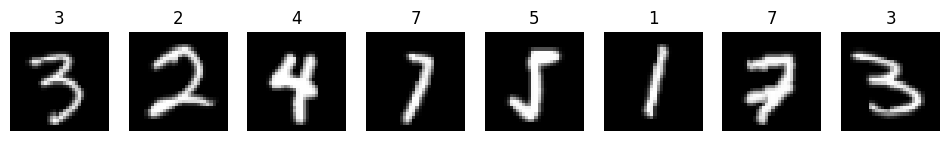

In [4]:
fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i, ax in enumerate(axes):
    img = denormalize(images[i]).squeeze(0)  
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{labels[i].item()}")
    ax.axis("off")

plt.show()

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = LeNet5(num_classes=10).to(device)
init_tanh_xavier(model)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) 


In [6]:
epochs = 4

for i in range(epochs):
    print(f"Epoch {i+1}/{epochs}")
    train_metrics = train_epoch_classification(train_loader, model, optimizer, criterion, device=device, amp=False)

Epoch 1/4


Train - loss: 0.3959 | acc@1: 89.34% | acc@3: 97.11%
Epoch 2/4


Train - loss: 0.1877 | acc@1: 94.84% | acc@3: 99.06%
Epoch 3/4


Train - loss: 0.1332 | acc@1: 96.34% | acc@3: 99.47%
Epoch 4/4


Train - loss: 0.1071 | acc@1: 97.04% | acc@3: 99.63%


In [7]:
val_metrics = evaluate_classification(test_loader, model, criterion, device=device, return_preds=False)

Val  - loss: 0.0863 | acc@1: 97.57% | acc@3: 99.76%


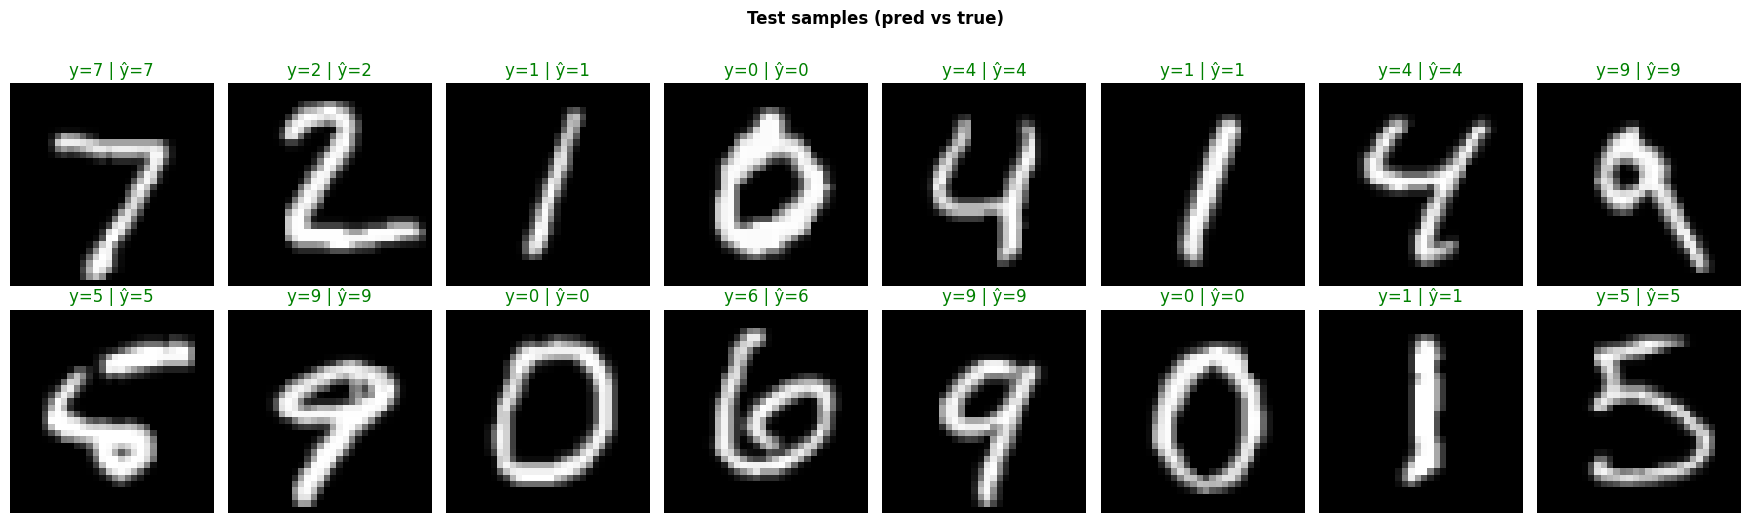

In [8]:
visualize_test_predictions(model, test_loader, device=device, n=16, only_errors=False)

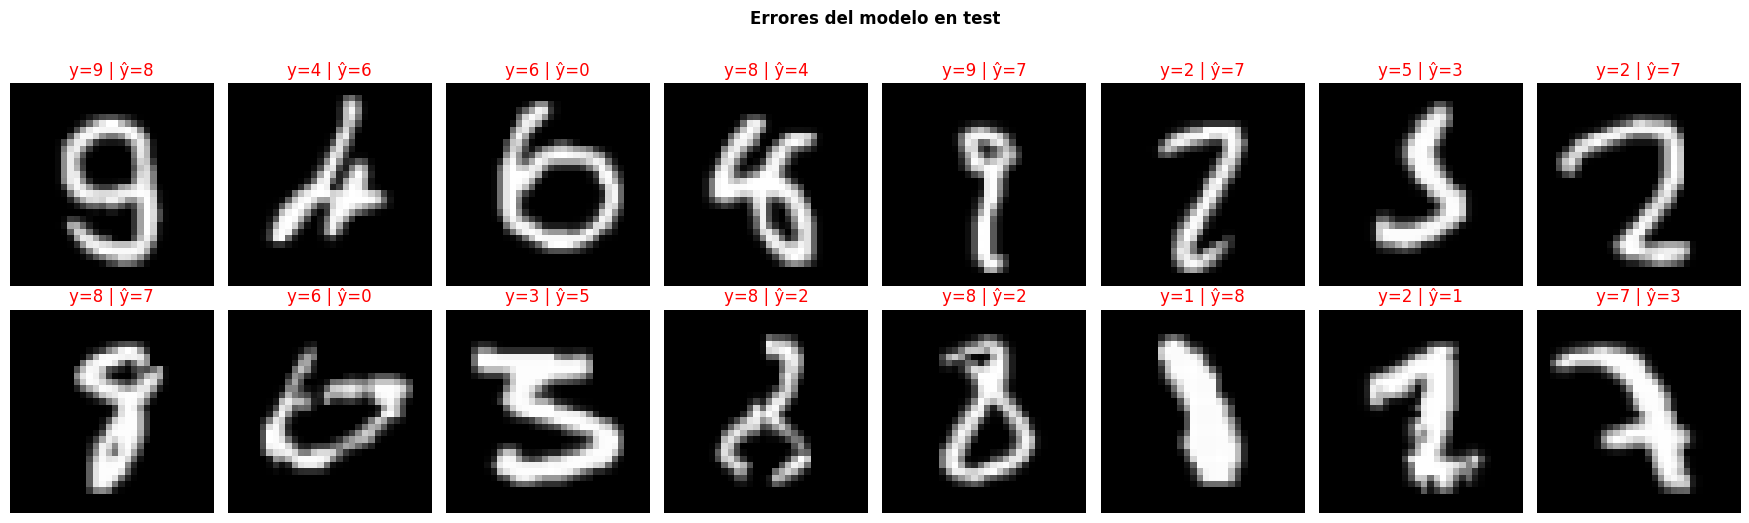

In [9]:
visualize_test_predictions(model, test_loader, device=device, n=16, only_errors=True)